# b-tagging Machine Learning Tutorial

training script for DL1

In [1]:
import h5py
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tensorflow as tf
print(tf.__version__)
import keras as k
print(k.__version__)
#pd.show_versions()

2.3.0
2.2.4


Using TensorFlow backend.


In [2]:
#from keras.layers import BatchNormalization
#from keras.layers import Dense, Activation, Input, add
#from keras.models import Model
#from keras.optimizers import Adam
#from keras.callbacks import ReduceLROnPlateau, Callback

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback


#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from plottingFunctions import sigBkgEff

In [5]:
num_of_epochs = 15

fig_name_losses = 'losses_50_500GeV_'+str(num_of_epochs)+'epoch.pdf'
fig_name_roc = 'roc_50_500GeV_'+str(num_of_epochs)+'epoch.pdf'
fig_name_dl1 = 'dl1_50_500GeV_'+str(num_of_epochs)+'epoch.pdf'
fig_name_perf = 'training_performance_50_500GeV_'+str(num_of_epochs)+'epoch.pdf'

roc_b_vs_l_txt_name = 'ROC_b_vs_lrej_50_500GeV_'+str(num_of_epochs)+'epoch.txt'
roc_c_vs_l_txt_name = 'ROC_c_vs_lrej_50_500GeV_'+str(num_of_epochs)+'epoch.txt'


In [6]:

#file_path = '/eos/user/s/shelena/btagging/train_on_lxplus_v210'
#trainfile_name = file_path+'/training_dijets_2015_3flav_full.h5'
#testfile_name = file_path+'/testing_dijets_2015_3flav_1_odd.h5'
#file_path = '/eos/user/s/shelena/btagging/sample_preparation'
file_path = '/eos/user/v/vcondeme/HI_btagging_LIP/b_tagging_lip/three_datasets'
validfile_name = file_path+'/validation_2.h5'
trainfile_name = file_path+'/training_2.h5'
h5f_train = h5py.File(trainfile_name, 'r')
h5f_train['X_train'].dtype ###????

dtype('<f8')

In [7]:
X_train = h5f_train['X_train'][:]
Y_train = h5f_train['Y_train'][:].astype(np.float64)
print ('X_train',type(X_train), 'len(): ', len(X_train))
print ('Y_train',type(Y_train), 'len(): ', len(Y_train))
print ('X_train[0, 0]',type(X_train[0,0]))
print ('X_train[0]', X_train[0])
print ('Y_train[0]', Y_train[0])
len(Y_train[1])

X_train <class 'numpy.ndarray'> len():  1412217
Y_train <class 'numpy.ndarray'> len():  1412217
X_train[0, 0] <class 'numpy.float64'>
X_train[0] [-4.14771500e-01 -1.45213072e-01 -5.77180561e-01  0.00000000e+00
 -2.44142206e-02  5.57302380e-03  8.30589188e-01 -1.58354153e-01
  4.73039727e-01  1.56093205e-01 -9.47083005e-02 -6.86597681e-01
  1.25254788e-08  1.00000000e+00 -5.05561545e-01 -6.42691449e-01
 -3.74814165e-09  9.39200179e-09  5.03535457e-09  9.42720822e-09
 -9.37585068e-01  0.00000000e+00 -8.52565727e-01 -9.15126818e-01
 -6.21124126e-01  0.00000000e+00 -4.56270164e-01 -6.99502446e-01
  6.08134017e-01  0.00000000e+00  6.02633898e-01 -1.53242592e-02
  2.22328274e-01 -4.00325539e-01 -3.31523200e-01  1.55868994e+00
 -8.33858346e-01  4.47568586e-01  6.11399493e-01 -2.68392392e-01
 -4.22053491e-01  2.91053867e+00]
Y_train[0] [0. 0. 1.]


3

In [8]:
h5f_validation = h5py.File(validfile_name, 'r')

In [9]:
X_valid = h5f_validation['X_validation'][:]
Y_valid = h5f_validation['Y_validation'][:].astype(np.float64)
#X_test = h5f_test['X_train'][:]
#Y_test = h5f_test['Y_train'][:].astype(np.float64)
#X_test = h5f_test['X_train'][:num_of_jets_to_test_on]
#Y_test = h5f_test['Y_train'][:num_of_jets_to_test_on].astype(np.float64)
#X_test = h5f_test['X_test'][:num_of_jets_to_test_on]
#Y_test = h5f_test['Y_test'][:num_of_jets_to_test_on].astype(np.float64)
#X_test = h5f_test['X_test'][2*num_of_jets_to_test_on:3*num_of_jets_to_test_on]
#Y_test = h5f_test['Y_test'][2*num_of_jets_to_test_on:3*num_of_jets_to_test_on].astype(np.float64)
print ('X_valid',type(X_valid), 'len(): ', len(X_valid))
print ('Y_valid',type(Y_valid), 'len(): ', len(Y_valid))
print ('X_valid[0]', X_valid[0])
print ('X_valid[1]', X_valid[1])
print ('Y_valid[0]', Y_valid[0])
len(Y_valid[1])

X_valid <class 'numpy.ndarray'> len():  334981
Y_valid <class 'numpy.ndarray'> len():  334981
X_valid[0] [-1.52733749e-01 -4.18144417e-01 -1.16269298e+00  0.00000000e+00
 -2.46093318e-01 -9.51564919e-02  8.30589188e-01 -1.58354153e-01
  4.73039727e-01 -2.51486386e-01 -9.92347853e-01 -6.86597681e-01
  1.25254788e-08  1.00000000e+00 -5.05561545e-01 -6.42691449e-01
 -3.74814165e-09  9.39200179e-09  5.03535457e-09  9.42720822e-09
 -4.42140468e-01  0.00000000e+00 -9.09270804e-02 -7.32094053e-01
 -4.47678828e-01  0.00000000e+00 -9.49132810e-02 -7.42140217e-01
  6.08134017e-01  0.00000000e+00 -5.00685359e-01 -1.65602917e-02
  1.69194955e-01  1.49387761e+00  2.38253520e+00  2.19880129e+00
  2.47826099e+00  2.44127851e+00  1.15562140e+00 -8.07904060e-02
 -5.31892314e-02  1.65105891e+00]
X_valid[1] [-1.03748425e+00 -2.48324230e-01  1.57997523e-08  1.00000000e+00
 -8.97877051e-01 -6.24548639e-01 -1.17967013e+00 -9.94443108e-01
 -9.74939569e-01 -5.23206114e-01  1.33751939e-08 -6.86597681e-01
  1.2

3

In [10]:
print('jets shape: ')
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

jets shape: 
(1412217, 42)
(1412217, 3)
(334981, 42)
(334981, 3)


Hack to test if FCal sum Et is making a difference 

In [11]:
#X_train[:, 41] = 0.5  
#X_test[:, 41] = 0.5 

In the following the DL1 network is defined

In [12]:
from tensorflow.python.framework import ops
ops.get_default_graph()
#tf.compat.v1.disable_eager_execution()
tf.compat.v1.get_default_graph


print(tf.compat.v1.get_default_graph())

# Input layer
inputs = Input(shape=(X_train.shape[1],))
# number of nodes in the different hidden layers
l_units = [72, 57, 60, 48, 36, 24, 12, 6]
x = inputs
# loop to initialise the hidden layers
for unit in l_units:
    x = Dense(units=unit, activation="linear", kernel_initializer='glorot_uniform')(x)
    #print ('x_1', x)
    x = BatchNormalization()(x)
    #print ('x_2', x)
    x = Activation('relu')(x)
    #print ('x_3', x)
#     x = Dropout(0.1)
# output layer, using softmax which will return a probability for each jet to be either light, c- or b-jet
predictions = Dense(units=3, activation='softmax',
                    kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=predictions)
model.summary()

model_optimizer = Adam(lr=0.01)
model.compile(  # loss='mse',
    loss='categorical_crossentropy',
    optimizer=model_optimizer,
    metrics=['accuracy']
)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 42)]              0         
_________________________________________________________________
dense (Dense)                (None, 72)                3096      
_________________________________________________________________
batch_normalization (BatchNo (None, 72)                288       
_________________________________________________________________
activation (Activation)      (None, 72)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 57)                4161      
_________________________________________________________________
batch_normalization_1 (Batch (None, 57)                228       
_________________________________________________________________
activation_1 (Activation)    (None, 57)               

In [13]:
def GetRejection(y_pred, y_true):
    """Calculates the c and light rejection for 77% WP and 0.018 c-fraction."""
    b_index, c_index, u_index = 2, 1, 0
    cfrac = 0.018
    target_beff = 0.77
    y_true = np.argmax(y_true, axis=1)
    b_jets = y_pred[y_true == b_index]
    c_jets = y_pred[y_true == c_index]
    u_jets = y_pred[y_true == u_index]
    bscores = np.log(b_jets[:, b_index] / (cfrac * b_jets[:, c_index] +
                                           (1 - cfrac) * b_jets[:, u_index]))
    cutvalue = np.percentile(bscores, 100.0 * (1.0 - target_beff))

    
    #HS problems in log(u_jets[:, b_index] / (cfrac *)
    u_jets[:, b_index] = np.where(u_jets[:, b_index]==0, 1e-10, u_jets[:, b_index])
    u_jets[:, c_index] = np.where(u_jets[:, c_index]==0, 1e-10, u_jets[:, c_index])
    u_jets[:, u_index] = np.where(u_jets[:, u_index]==0, 1e-10, u_jets[:, u_index])
    
    for x in u_jets[:, b_index]:
        if x == 1e-10:
            print('ujets_b', x)
    
    for y in u_jets[:, c_index]:
        if y == 1e-10:
            print('ujets_c', y)
   
    for z in u_jets[:, u_index]:
        if z == 1e-10:
            print('ujets_u', z)

    c_eff = len(c_jets[np.log(c_jets[:, b_index] / (cfrac * c_jets[:, c_index]
                                                    + (1 - cfrac) *
                                                    c_jets[:, u_index])) >
                       cutvalue]) / float(len(c_jets))
    #u_eff = len(u_jets[np.log(u_jets[:, b_index] / (cfrac *
    u_eff = len(u_jets[np.log(u_jets[:, b_index] / (cfrac * u_jets[:, c_index] 
                                       + (1 - cfrac) *
                                       u_jets[:, u_index])) >
                       cutvalue]) / float(len(u_jets))

    if c_eff == 0 or u_eff == 0:
        return -1, -1
    return 1. / c_eff, 1. / u_eff


class MyCallback(Callback):
    """Custom callback function calculating per epoch light and c-rejection and saves the model of each epoch."""
    def __init__(self, X_valid=0, Y_valid=0,
                 model_name='test', store_all=False):
        self.X_valid = X_valid
        self.Y_valid = Y_valid
        self.result = []
        self.model_name = model_name
        os.system("mkdir -p %s" % self.model_name)
        self.dict_list = []
        self.store_all = store_all

    def on_epoch_end(self, epoch, logs=None):
        if self.store_all:
            self.model.save('%s/model_epoch%i.h5' % (self.model_name, epoch))
        y_pred = self.model.predict(self.X_valid, batch_size=5000)
        c_rej, u_rej = GetRejection(y_pred, self.Y_valid)
        dict_epoch = {
            "epoch": epoch,
            "loss": logs['loss'],
            "acc": logs['accuracy'],
            #"loss": logs['loss'].astype(np.float64), # HS commented this (causes: AttributeError: 'float' object has no attribute 'astype'. Then I noticed that the tutorial has no astype(np.float64) in fact.)
            #"acc": logs['accuracy'].astype(np.float64), 
            "val_loss": logs['val_loss'],
            "val_acc": logs['val_accuracy'],
            "c_rej": c_rej,
            "u_rej": u_rej
        }

        self.dict_list.append(dict_epoch)
        with open('%s/DictFile.json' % self.model_name, 'w') as outfile:
            json.dump(self.dict_list, outfile, indent=4)

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.00001)
my_callback = MyCallback(X_valid=X_valid,
                         Y_valid=Y_valid,
                         model_name="DL1_example"
#                         ,store_all=True #flag to store model of each epoch
                        )

callbacks = [reduce_lr, my_callback]

#model.fit?
model.fit(X_train, Y_train,
          validation_data=(X_valid[:], Y_valid[:]),
          epochs=num_of_epochs, # typically ~130 are necessary to converge
          #batch_size=64,
          batch_size=3000,
          callbacks=callbacks, 
          verbose=1
          )

Epoch 1/15
471/471 [==============================] - 15s 32ms/step - loss: 0.7689 - accuracy: 0.6338 - val_loss: 0.5766 - val_accuracy: 0.8295
Epoch 2/15
471/471 [==============================] - 14s 30ms/step - loss: 0.7529 - accuracy: 0.6430 - val_loss: 0.5287 - val_accuracy: 0.8491
Epoch 3/15
471/471 [==============================] - 14s 29ms/step - loss: 0.7500 - accuracy: 0.6449 - val_loss: 0.5654 - val_accuracy: 0.8534
Epoch 4/15
471/471 [==============================] - 13s 29ms/step - loss: 0.7477 - accuracy: 0.6459 - val_loss: 0.6426 - val_accuracy: 0.8089
Epoch 5/15
471/471 [==============================] - 13s 29ms/step - loss: 0.7464 - accuracy: 0.6467 - val_loss: 0.6032 - val_accuracy: 0.8430
Epoch 6/15
471/471 [==============================] - 13s 28ms/step - loss: 0.7455 - accuracy: 0.6471 - val_loss: 0.7110 - val_accuracy: 0.7911
Epoch 7/15
471/471 [==============================] - 13s 28ms/step - loss: 0.7443 - accuracy: 0.6479 - val_loss: 0.6764 - val_accuracy:

In [15]:
df_results = pd.read_json("DL1_example/DictFile.json")
df_results

epoch      loss       acc  val_loss   val_acc     c_rej      u_rej
0       0  0.768906  0.633808  0.576627  0.829537  3.329462  32.965271
1       1  0.752918  0.643047  0.528712  0.849132  3.142350  37.180964
2       2  0.750017  0.644852  0.565357  0.853407  3.138957  37.756877
3       3  0.747725  0.645944  0.642619  0.808885  3.160404  35.315021
4       4  0.746379  0.646731  0.603209  0.842991  3.135572  37.864794
5       5  0.745514  0.647097  0.711004  0.791081  3.176186  38.149243
6       6  0.744324  0.647931  0.676356  0.788113  3.076795  38.269028
7       7  0.743738  0.648020  0.639460  0.793529  3.159423  38.608464
8       8  0.742849  0.648786  0.695583  0.789839  3.180653  38.667259
9       9  0.742484  0.648821  0.591443  0.841197  3.180653  39.387022
10     10  0.741920  0.649121  0.611170  0.830175  3.139926  39.018824
11     11  0.741415  0.649562  0.584948  0.840707  3.198146  39.209626
12     12  0.740971  0.649520  0.687789  0.800571  3.151595  37.836583
13     13  0.740720  0.649743  0.704520  0.805273  3.220411  39.648406
14     14  0.740395  0.650038  0.700211  0.807891  3.182145  40.539915

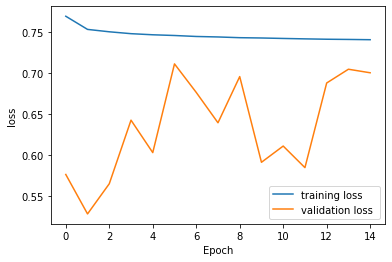

In [16]:
plt.plot(df_results['epoch'],df_results['loss'], label='training loss ')
plt.plot(df_results['epoch'],df_results['val_loss'], label='validation loss ')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.savefig(fig_name_losses)
plt.show()
plt.close()

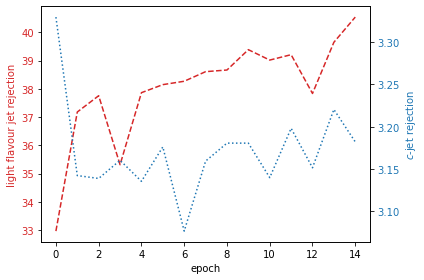

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('light flavour jet rejection', color=color)
ax1.plot(df_results["epoch"],df_results['u_rej'], '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$c$-jet rejection', color=color)  # we already handled the x-label with ax1
ax2.plot(df_results["epoch"], df_results['c_rej'], ':', color=color, label='std = 0.12')
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()
fig.savefig(fig_name_perf)


## Hyper parameter optimisation
You can play with different hyper parameters and see their impact.
The largest impact has the NN-structure itself, you can try changing the number of hidden layers and their number of nodes
Other hyper parameters are the learning rate, activation function, batch size


In [18]:
# Evaluate the performance with the ROC curves!
predictions = model.predict(X_valid,verbose=True)

10469/10469 [==============================] - 11s 1ms/step


In [19]:
print(predictions[0])

# To make sure you're not discarding the b-values with high
# discriminant values that you're good at classifying, use the
# max from the distribution
    
for x in predictions [:,2]:
    if x == 0:
        print('bjets pred', x)
for y in predictions [:,1]:
    if y == 0:
        print('cjets pred', y)
for z in predictions [:,0]:
    if z == 0:
        print('ljets pred', z)

[0.706033   0.2498249  0.04414213]


In [20]:
predictions[:,2] = np.where(predictions[:,2]==0, 1e-10, predictions[:,2])
predictions[:,1] = np.where(predictions[:,1]==0, 1e-10, predictions[:,1])
predictions[:,0] = np.where(predictions[:,0]==0, 1e-10, predictions[:,0])

In [21]:
fc=0.07
disc = np.log(np.divide(predictions[:,2], fc*predictions[:,1] + (1 - fc) * predictions[:,0]))

In [22]:
#X_test tem muitos valores iguais ...
print(X_valid[3])

[ 4.58162580e-01 -5.32626766e-01  1.57997523e-08  1.00000000e+00
 -8.97877051e-01 -6.24548639e-01 -1.17967013e+00 -9.94443108e-01
 -9.74939569e-01 -5.23206114e-01  1.33751939e-08 -6.86597681e-01
  1.25254788e-08  1.00000000e+00 -5.05561545e-01 -6.42691449e-01
 -3.74814165e-09  9.39200179e-09  5.03535457e-09  9.42720822e-09
 -4.41442466e-01  0.00000000e+00 -1.51643159e-01 -6.71860218e-01
 -4.82149330e-01  0.00000000e+00 -1.52618719e-01 -7.48031674e-01
 -9.64943264e-01  1.00000000e+00  1.88678408e-08  5.88985692e-10
 -7.07486003e-01 -6.19344037e-01 -8.51930096e-09 -5.54407421e-08
 -5.06116849e-09  1.19936245e-08  6.68625197e-01 -2.51424402e-01
 -7.69391682e-01  3.81033707e+00]


In [23]:
#O que quer dizer isto?
'''
Note: For jets w/o any tracks
'''
discMax = np.max(disc)
discMin = np.min(disc)
myRange=(-20,30)
myRange=(discMin,discMax)

In [24]:
print('disc min, max', discMin,discMax)
nBins = 200
y_valid = Y_valid[:]

disc min, max -3.9749556 15.641856


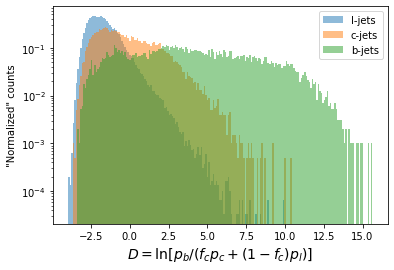

In [25]:
effs = []
plt.figure()
for output, flavor in zip([0,1,2], ['l','c','b']):
    ix = (np.argmax(y_valid,axis=-1) == output) ##array de true false
        
    # Plot the discriminant output
    nEntries, edges ,_ = plt.hist(disc[ix],alpha=0.5,label='{}-jets'.format(flavor),
                                    bins=nBins, range=myRange, density=True, log=True)
    

    '''
    nEntries is just a sum of the weight of each bin in the histogram.
        
        
    Since high Db scores correspond to more b-like jets, compute the cummulative density function
    from summing from high to low values, this is why we reverse the order of the bins in nEntries
    using the "::-1" numpy indexing.
    '''
    eff = np.add.accumulate(nEntries[::-1]) / np.sum(nEntries)
    effs.append(eff)

plt.legend()
plt.xlabel('$D = \ln [ p_b / (f_c p_c + (1- f_c)p_l ) ]$',fontsize=14)
plt.ylabel('"Normalized" counts')
plt.show()
plt.close()


## Model Evaluation

In [26]:
b_effs = np.linspace(0.39, 1, 150)
l_rej = 1./np.load("DL1r-extbeff-22M.npy", allow_pickle=True).item().get('urej')
c_rej = 1./np.load("DL1r-extbeff-22M.npy", allow_pickle=True).item().get('crej')


In [27]:
# To draw the roc curves faster, look at a subset of the test dataset. 
#nTest = num_of_jets_to_test_on
nTest = 5000000

/eos/user/v/vcondeme/HI_btagging_LIP/b_tagging_lip/three_datasets/validation_2.h5
10469/10469 [==============================] - 10s 961us/step
disc min, max -4.021016 16.805264


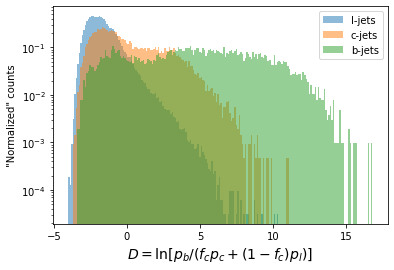

In [28]:
dl1_leffs, dl1_ceffs, dl1_beffs, dl1_discs = [], [], [], []
   
print(validfile_name)
#h5f_test = h5py.File(testfile_name, 'r')

#a = list(h5f_test.keys())
#print ('datasets in file', a)
#print (h5f_test['X_test'].dtype)
#print (h5f_test['X_test'].shape)

#X_test = h5f_test['X_test'][:]
#y_test = h5f_test['Y_test'][:]
    
#print("type X_test",type(X_test))
#print("length X_test",len(X_test))
#print(type(y_test))
#print("length y_test",len(y_test))
#h5f_test.close()

#(leff, ceff, beff), d = sigBkgEff(model, X_test[:nTest], Y_test[:nTest], returnDisc=True, fc=0.018)
#(leff, ceff, beff), d = sigBkgEff(model, X_test[:nTest], Y_test[:nTest], returnDisc=True, fc=0.018, fig_name=fig_name_dl1)
(leff, ceff, beff), d = sigBkgEff(model, X_valid[:], Y_valid[:], returnDisc=True, fc=0.018, fig_name=fig_name_dl1)
     
dl1_leffs.append(leff)
dl1_ceffs.append(ceff)
dl1_beffs.append(beff)
dl1_discs.append(d)
        

In [29]:
np.save('ROC_curve_data/leffs_2.npy', dl1_leffs)
np.save('ROC_curve_data/ceffs_2.npy', dl1_ceffs)
np.save('ROC_curve_data/beffs_2.npy', dl1_beffs)

<ipython-input-30-4fbd15d40e31>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(dl1_beffs[0], 1. / dl1_leffs[0], color='C4', label='l-rej')
<ipython-input-30-4fbd15d40e31>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(dl1_beffs[0], 1. / dl1_ceffs[0],"--", color='C4', label='c-rej')


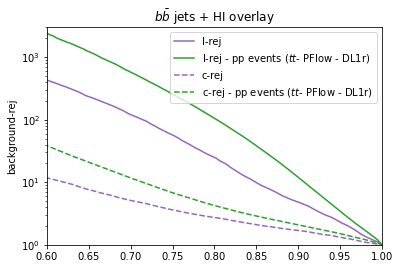

In [30]:
# compare with pp recomsndations 
plt.figure()
plt.plot(dl1_beffs[0], 1. / dl1_leffs[0], color='C4', label='l-rej')
#plt.plot(b_effs, 1./l_rej, color='C2', label='l-rej - pp recommendations')
plt.plot(b_effs, 1./l_rej, color='C2', label='l-rej - pp events ($t$$t\bar{t}$- PFlow - DL1r)')
# plt.figure()
plt.plot(dl1_beffs[0], 1. / dl1_ceffs[0],"--", color='C4', label='c-rej')
#plt.plot(b_effs, 1./c_rej, "--", color='C2', label='c-rej - pp recommendations')
plt.plot(b_effs, 1./c_rej, "--", color='C2', label='c-rej - pp events ($tt\bar{t}$- PFlow - DL1r)')

plt.ylabel('background-rej')

plt.legend()
plt.title(r'$b\bar{b}$ jets + HI overlay')
#plt.title(r'$t\bar{t}$- PFlow - DL1r')
plt.yscale("log")
plt.xlim(0.6,1)
plt.ylim(1,3000)

plt.savefig(fig_name_roc)
plt.show()
plt.close()

In [31]:
np.savetxt(roc_b_vs_l_txt_name , np.column_stack((dl1_beffs[0],1./dl1_leffs[0])), delimiter=' ')
np.savetxt(roc_c_vs_l_txt_name , np.column_stack((dl1_beffs[0],1./dl1_ceffs[0])), delimiter=' ')

<ipython-input-31-a4d7068cbb64>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.savetxt(roc_b_vs_l_txt_name , np.column_stack((dl1_beffs[0],1./dl1_leffs[0])), delimiter=' ')
<ipython-input-31-a4d7068cbb64>:2: RuntimeWarning: divide by zero encountered in true_divide
  np.savetxt(roc_c_vs_l_txt_name , np.column_stack((dl1_beffs[0],1./dl1_ceffs[0])), delimiter=' ')


In [32]:
# get the architecture as a json string
arch = model.to_json()
# save the architecture string to a file somehow, the below will work
with open('architecture.json', 'w') as arch_file:
    arch_file.write(arch)
# now save the weights as an HDF5 file
model.save_weights('weights.h5')